### 🔹 0. Setup & Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

plt.style.use('seaborn-v0_8')
df = pd.read_csv("../data/used_cars_data_cleaned.csv")

### 🔹 1. Basic Overview

In [3]:
cat_cols = [
    'Location',
    'Fuel_Type',
    'Transmission',
    'Owner_Type',
    'Seats'
]
df[cat_cols] = df[cat_cols].astype('category')

df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7246 entries, 0 to 7245
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Brand_Name         7246 non-null   object  
 1   Model_Name         7246 non-null   object  
 2   Location           7246 non-null   category
 3   Year               7246 non-null   int64   
 4   Kilometers_Driven  7246 non-null   float64 
 5   Fuel_Type          7246 non-null   category
 6   Transmission       7246 non-null   category
 7   Owner_Type         7246 non-null   category
 8   Mileage            7244 non-null   float64 
 9   Engine             7244 non-null   float64 
 10  Power              7246 non-null   float64 
 11  Seats              7246 non-null   category
 12  Price              7246 non-null   float64 
dtypes: category(5), float64(5), int64(1), object(2)
memory usage: 489.6+ KB


Brand_Name           0
Model_Name           0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               2
Power                0
Seats                0
Price                0
dtype: int64

In [4]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
count,7246.000000,7246.000000,7244.00000,7244.000000,7246.000000,7246.000000
mean,2013.369445,57633.567071,18.33001,1615.676146,112.275673,9.340847
std,3.248103,35163.487475,4.14674,594.531804,53.417316,10.873384
min,1998.000000,171.000000,6.40000,624.000000,34.200000,0.440000
25%,2011.000000,34000.000000,15.29750,1198.000000,75.000000,3.500000
50%,2014.000000,53366.000000,18.20000,1493.000000,92.000000,5.500000
75%,2016.000000,73000.000000,21.10000,1968.000000,138.030000,9.850000
max,2019.000000,337450.000000,33.54000,5998.000000,616.000000,160.000000


### 🔹 2. UNIVARIATE ANALYSIS
#### 2.1 Numerical Variables

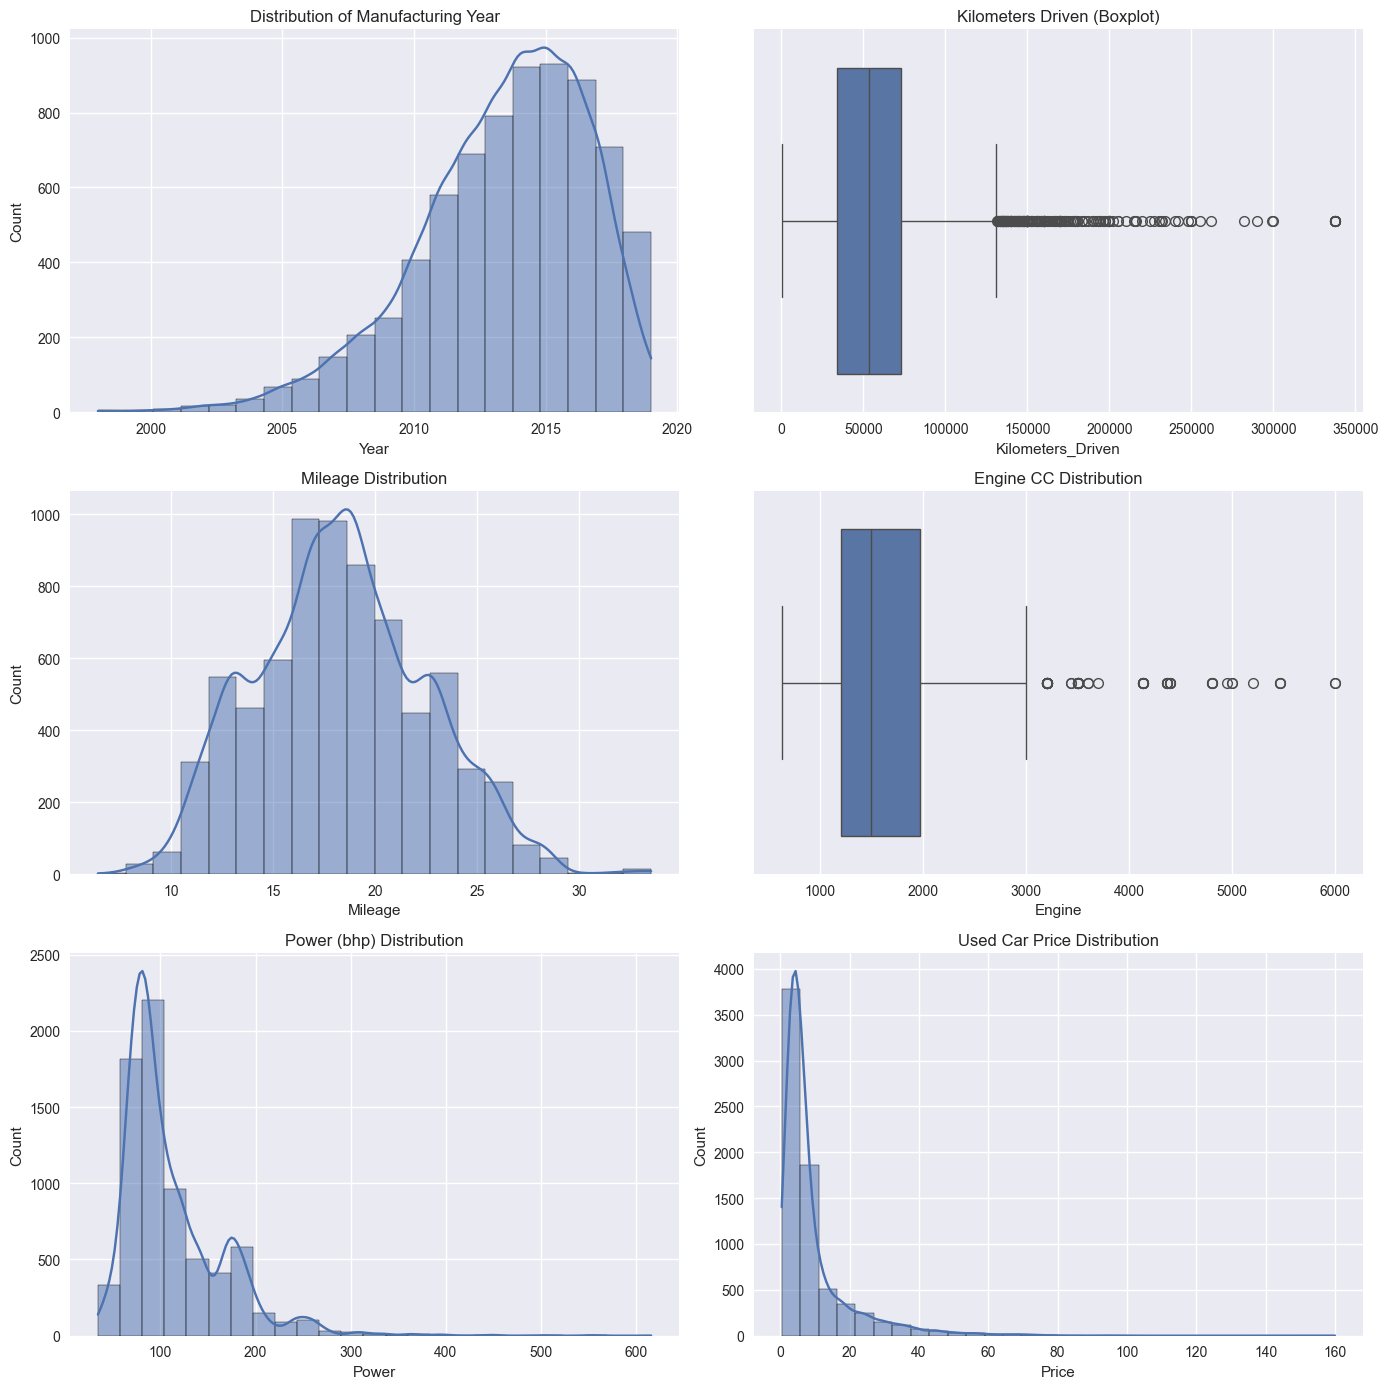

In [5]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))
axes = axes.flatten()

# 1️⃣ Year Distribution
sns.histplot(df['Year'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Manufacturing Year')

# 2️⃣ Kilometers Driven Boxplot
sns.boxplot(x=df['Kilometers_Driven'], ax=axes[1])
axes[1].set_title('Kilometers Driven (Boxplot)')

# 3️⃣ Mileage Distribution
sns.histplot(df['Mileage'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Mileage Distribution')

# 4️⃣ Engine CC Distribution
sns.boxplot(x=df['Engine'], ax=axes[3])
axes[3].set_title('Engine CC Distribution')

# 5️⃣ Power (bhp) Distribution
sns.histplot(df['Power'], bins=25, kde=True, ax=axes[4])
axes[4].set_title('Power (bhp) Distribution')

# 6️⃣ Price Distribution (Target Variable)
sns.histplot(df['Price'], bins=30, kde=True, ax=axes[5])
axes[5].set_title('Used Car Price Distribution')

# Adjust spacing
plt.tight_layout()
plt.show()


📌 Key EDA Insights

* The dataset is skewed toward newer vehicles, indicating higher market demand for recent models.
* Most cars have moderate usage (30k–80k km); extremely high-mileage vehicles are rare.
* Kilometers driven shows a right-skewed distribution, with a small number of heavy-use outliers.
* Mileage remains fairly consistent, suggesting standardized fuel efficiency across segments.
* The market is dominated by mid-segment cars (1,000–2,000 cc engines), with a small luxury tail.
* Power (bhp) clearly separates mass-market and premium vehicles.
* Car prices are highly right-skewed, highlighting the presence of a limited high-value luxury segment.
* Outliers are present across usage, engine, power, and price, requiring careful handling during modeling.

#### 2.2 Categorical Variables

In [6]:
df.describe(include=['category','object'])

,Brand_Name,Model_Name,Location,Fuel_Type,Transmission,Owner_Type,Seats
count,7246,7246,7246,7246,7246,7246,7246.0
unique,30,2038,11,5,2,4,8.0
top,Maruti,XUV500 W8 2WD,Mumbai,Diesel,Manual,First,5.0
freq,1444,55,947,3849,5200,5947,6093.0


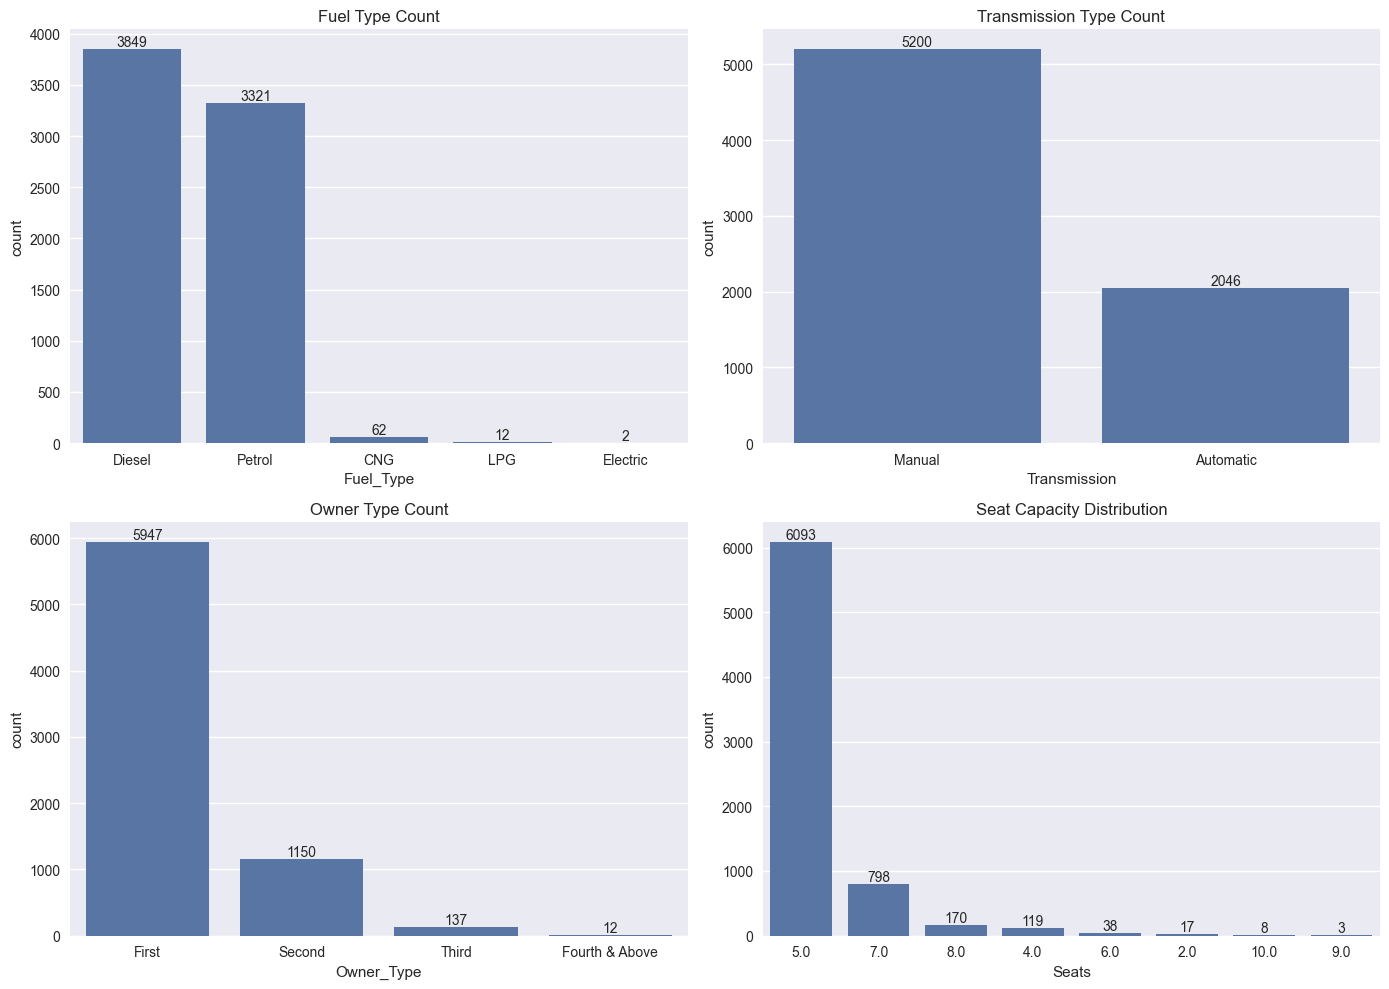

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1️⃣ Fuel Type
ax1 = sns.countplot(x='Fuel_Type', data=df, ax=axes[0], order=df['Fuel_Type'].value_counts().index)
ax1.bar_label(ax1.containers[0])
axes[0].set_title('Fuel Type Count')

# 2️⃣ Transmission
ax2 = sns.countplot(x='Transmission', data=df, ax=axes[1], order=df['Transmission'].value_counts().index)
ax2.bar_label(ax2.containers[0])
axes[1].set_title('Transmission Type Count')

# 3️⃣ Owner Type
ax3 = sns.countplot(x='Owner_Type', data=df, ax=axes[2], order=df['Owner_Type'].value_counts().index)
ax3.bar_label(ax3.containers[0])
axes[2].set_title('Owner Type Count')

# 4️⃣ Seats
ax4 = sns.countplot(x='Seats', data=df, ax=axes[3], order=df['Seats'].value_counts().index)
ax4.bar_label(ax4.containers[0])
axes[3].set_title('Seat Capacity Distribution')

plt.tight_layout()
plt.show()


📌 Insights Proven by the Plots

* **Fuel Type**:
    Diesel and Petrol vehicles dominate the dataset, reflecting real-world used-car market demand.

* **Transmission**:
    Manual cars significantly outnumber automatics, indicating price sensitivity and broader availability in the used market.

* **Ownership Pattern**:
    First-owner vehicles form the majority, suggesting higher buyer preference for lower ownership risk.

* **Seating Capacity**:
    Most cars have 5 seats, highlighting dominance of hatchbacks and compact/mid-size sedans.

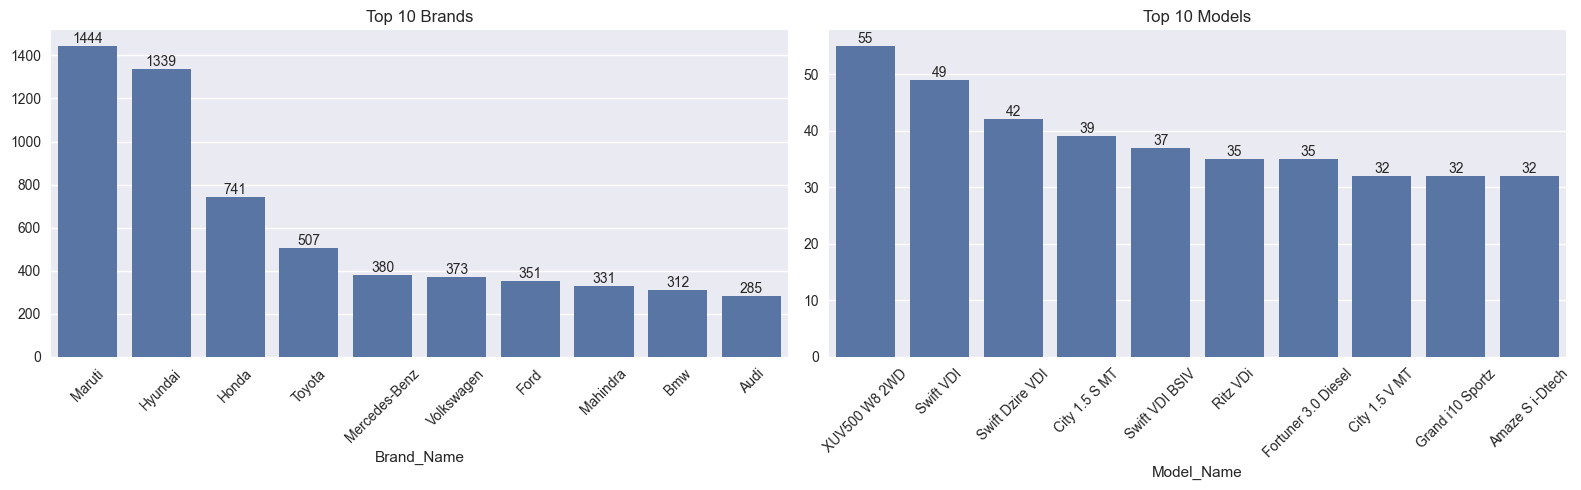

In [8]:
### Combined Subplots (Brand + Model Together)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Brand plot
top_brands = df['Brand_Name'].value_counts().head(10)
ax1 = sns.barplot(x=top_brands.index, y=top_brands.values, ax=axes[0])
ax1.bar_label(ax1.containers[0])
axes[0].set_title('Top 10 Brands')
axes[0].tick_params(axis='x', rotation=45)

# Model plot
top_models = df['Model_Name'].value_counts().head(10)
ax2 = sns.barplot(x=top_models.index, y=top_models.values, ax=axes[1])
ax2.bar_label(ax2.containers[0])
axes[1].set_title('Top 10 Models')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


* **Brand level**: The used-car market is highly concentrated, with Maruti and Hyundai dominating listings, indicating strong brand trust and resale liquidity.

* **Model level**: A small set of popular models across hatchbacks and SUVs drives most resale activity, reflecting stable demand and strong model-level acceptance.

### 🔹 3. BIVARIATE ANALYSIS

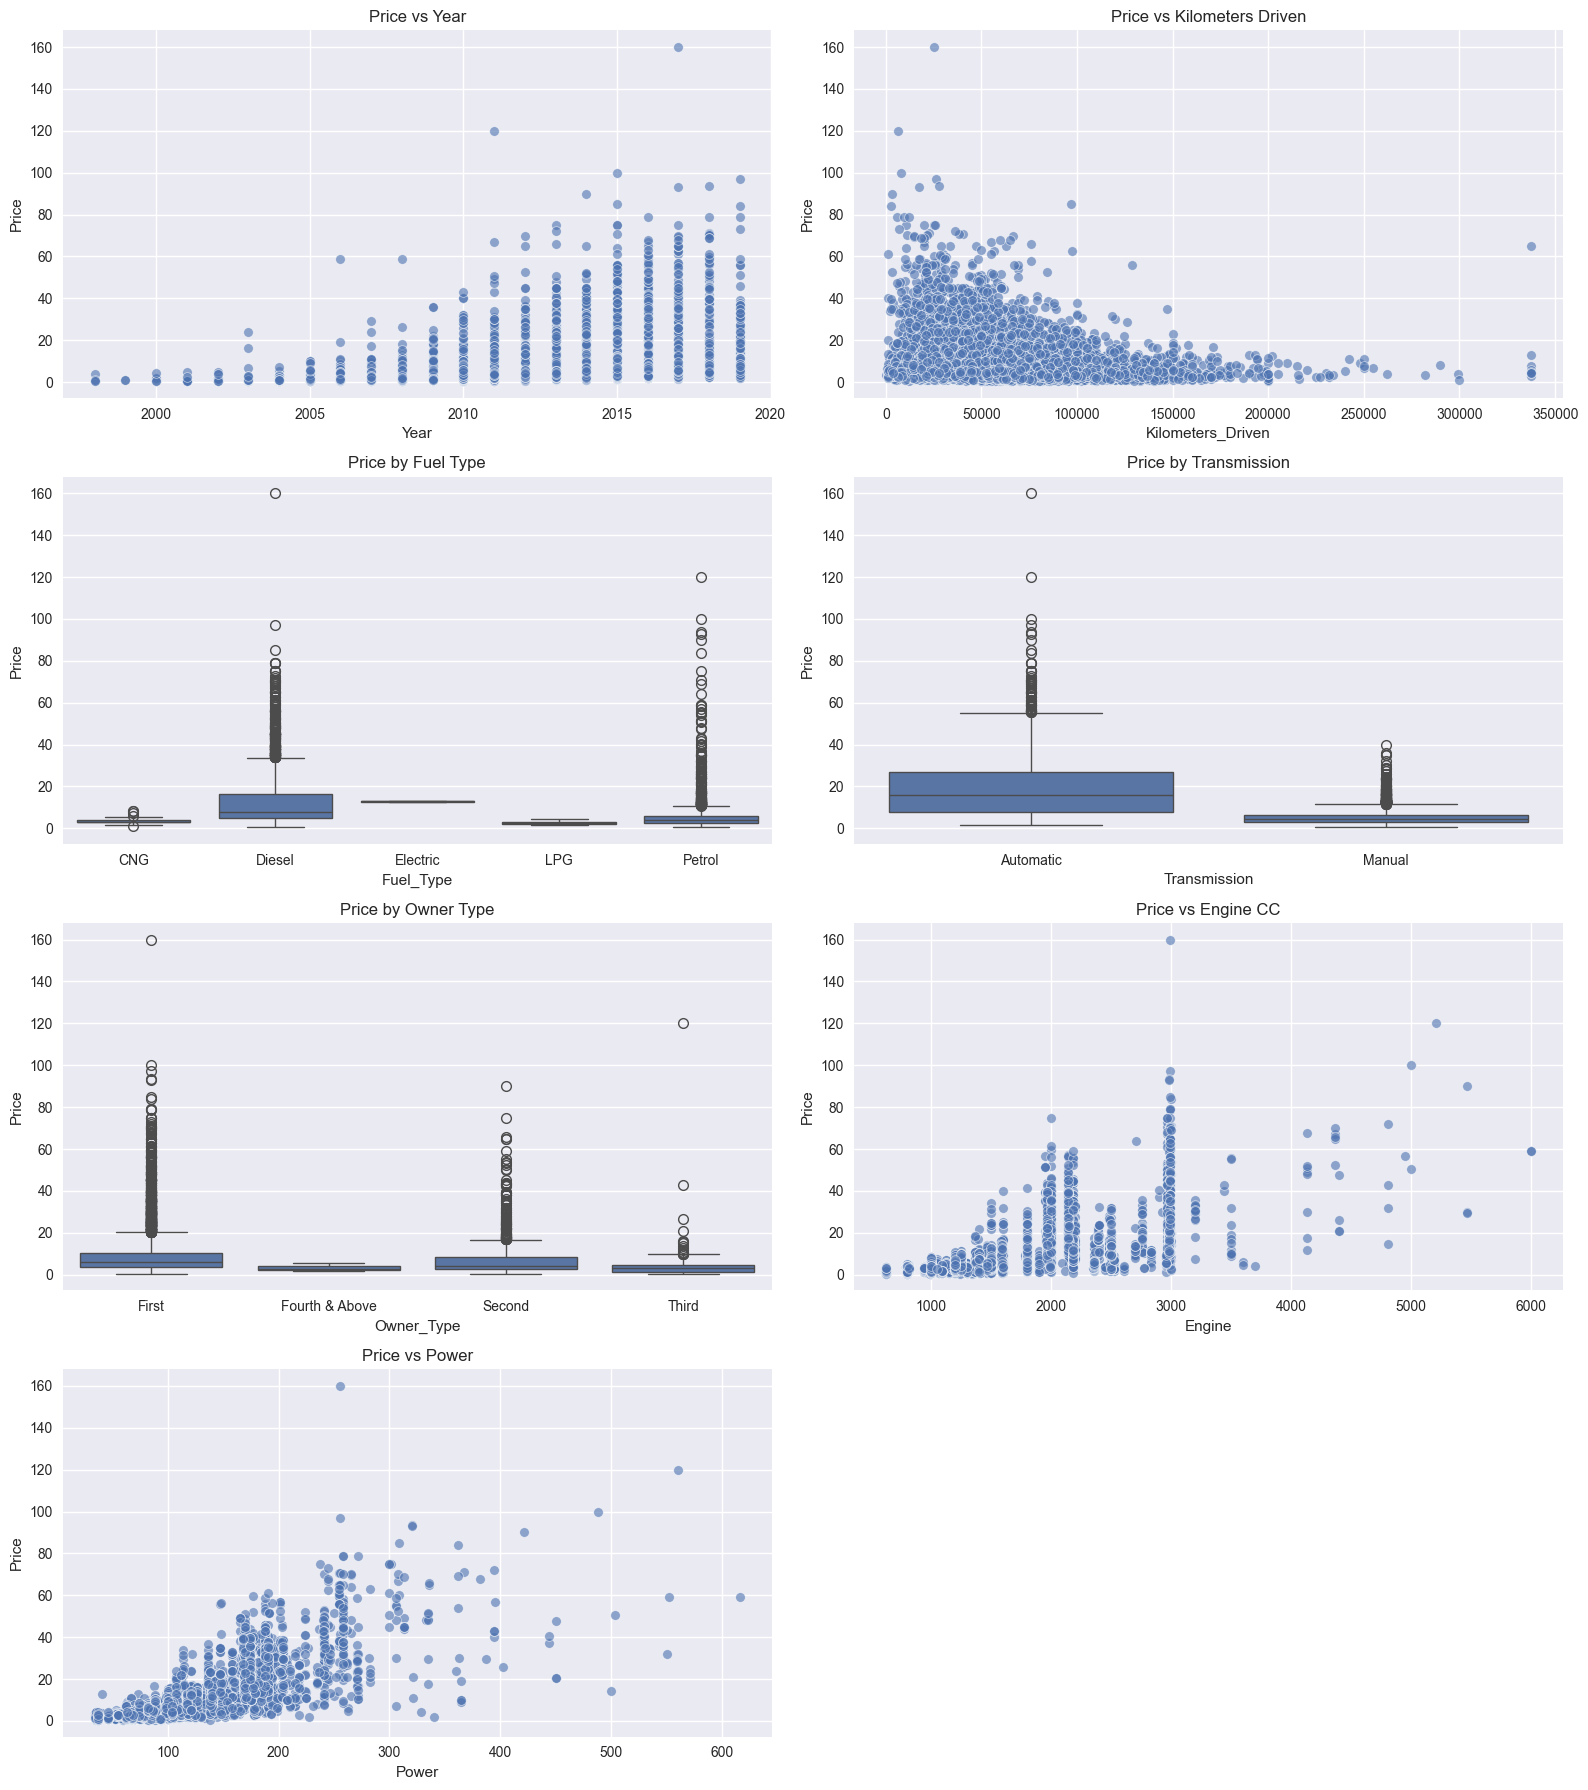

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

# 1️⃣ Price vs Year
sns.scatterplot(x='Year', y='Price', data=df, alpha=0.6, ax=axes[0])
axes[0].set_title('Price vs Year')

# 2️⃣ Price vs Kilometers Driven
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df, alpha=0.6, ax=axes[1])
axes[1].set_title('Price vs Kilometers Driven')

# 3️⃣ Price vs Fuel Type
sns.boxplot(x='Fuel_Type', y='Price', data=df, ax=axes[2])
axes[2].set_title('Price by Fuel Type')

# 4️⃣ Price vs Transmission
sns.boxplot(x='Transmission', y='Price', data=df, ax=axes[3])
axes[3].set_title('Price by Transmission')

# 5️⃣ Price vs Owner Type
sns.boxplot(x='Owner_Type', y='Price', data=df, ax=axes[4])
axes[4].set_title('Price by Owner Type')

# 6️⃣ Price vs Engine
sns.scatterplot(x='Engine', y='Price', data=df, alpha=0.6, ax=axes[5])
axes[5].set_title('Price vs Engine CC')

# 7️⃣ Price vs Power
sns.scatterplot(x='Power', y='Price', data=df, alpha=0.6, ax=axes[6])
axes[6].set_title('Price vs Power')

# Remove unused subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.show()


📊 Price Relationship Insights

* **Price vs Year**: Newer cars command higher prices, confirming clear depreciation with age.

* **Price vs Kilometers Driven**: Price decreases as usage increases, with high-end cars showing some resistance to depreciation.

* **Fuel Type**: Diesel and electric vehicles generally have higher median prices than petrol, CNG, and LPG cars.

* **Transmission**: Automatic cars are priced significantly higher than manual variants.

* **Owner Type**: First-owner cars retain higher value; price declines with increasing ownership count.

* **Engine & Power**: Price shows a strong positive relationship with both engine capacity and power, making them key pricing drivers.

### 🔹 4. MULTIVARIATE ANALYSIS

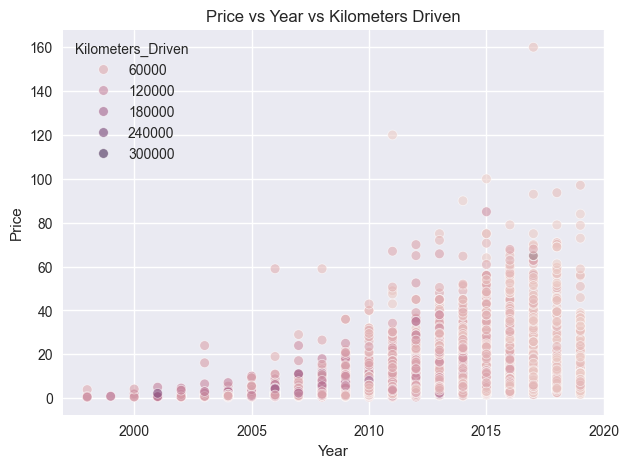

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Year',
    y='Price',
    hue='Kilometers_Driven',
    sizes=(20,200),
    data=df,
    alpha=0.6
)
plt.title('Price vs Year vs Kilometers Driven')
plt.show()


📊 Multivariate Insights (Price · Year · Kilometers Driven)

* Newer cars consistently command higher prices, even when mileage is moderately high, highlighting the strong impact of manufacturing year on resale value.

* For the same manufacturing year, cars with lower kilometers driven are priced higher, confirming mileage-driven depreciation.

* High-mileage vehicles (>200k km) are concentrated in lower price ranges, regardless of year.

* A small number of high-priced outliers with relatively high mileage likely represent luxury or performance vehicles, indicating valid premium segments.

* The plot shows a trade-off effect: higher mileage can partially offset the price advantage of newer cars.

#### ✅ Correlation Heatmap (Numerical Features)

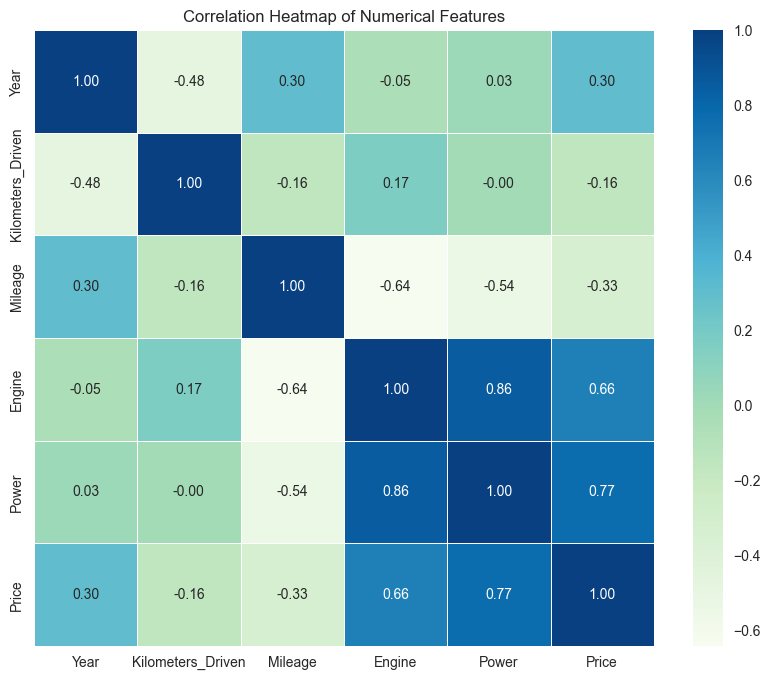

In [11]:
num_cols = ['Year','Kilometers_Driven','Mileage','Engine','Power','Price']
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="GnBu",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


📌 How to Interpret (Concise Insights)

* **Price** shows strong positive correlation with Year, Engine, and Power.
* **Kilometers_Driven** is negatively correlated with Price, confirming depreciation with usage.
* **Mileage** typically has weak correlation with Price
* **Engine and Power** are highly correlated, indicating potential multicollinearity.


### 🔹 5. HYPOTHESIS TESTING (HT)

##### HT-1: Transmission vs Price (t-test)

* **H₀**: Mean price of Manual = Automatic
* **H₁**: Mean price of Automatic > Manual

In [12]:
manual_price = df[df['Transmission'] == 'Manual']['Price']
auto_price = df[df['Transmission'] == 'Automatic']['Price']

t_stat, p_val = stats.ttest_ind(auto_price, manual_price, equal_var=False)
print(t_stat, p_val)
if p_val < 0.05:
    print("Reject H0: Transmission impacts price")
else:
    print("Fail to reject H0")


41.02545359919864 1.2546956208203998e-271
Reject H0: Transmission impacts price


**📌 Interpretation**

* The p-value is far below 0.05
* The difference in mean prices between Manual and Automatic cars is statistically significant

**💡 Insight**

* Automatic transmission vehicles command significantly higher resale prices than manual vehicles in the used-car market.

**🧠 Business Meaning**

* Buyers are willing to pay a premium for convenience
* Automatic transmission is a strong positive price drive

#### HT-2: Fuel Type vs Price (ANOVA)

* **H₀**: Mean price is same across fuel types

In [13]:
groups = [
    df[df['Fuel_Type'] == fuel]['Price']
    for fuel in df['Fuel_Type'].unique()
]

f_stat, p_val = stats.f_oneway(*groups)

print(f_stat, p_val)
if p_val < 0.05:
    print("Reject H0: Fuel type affects price")
else:
    print("Fail to reject H0")


216.00235862334532 2.2190251490834558e-175
Reject H0: Fuel type affects price


**📌 Interpretation**

* Extremely small p-value → very strong evidence
* Mean prices differ significantly across fuel types

**💡 Insight**
* Fuel type has a major impact on used-car prices, with Diesel vehicles generally retaining higher resale value than Petrol and other fuel types.

**🧠 Business Meaning**

* Fuel efficiency and longevity influence resale value
* Fuel type should be treated as a key pricing feature

#### HT-3: Owner Type vs Price (ANOVA)

In [14]:
groups = [
    df[df['Owner_Type'] == owner]['Price']
    for owner in df['Owner_Type'].unique()
]

f_stat, p_val = stats.f_oneway(*groups)

print(f_stat, p_val)

if p_val < 0.05:
    print("Reject H0: Owner type affects price")
else:
    print("Fail to reject H0")

21.79465164181484 4.786602726876787e-14
Reject H0: Owner type affects price


**📌 Interpretation**

* p-value ≪ 0.05 → statistically significant
* Mean prices vary across ownership categories

**💡 Insight**

First-owner vehicles are priced significantly higher than second or multiple-owner vehicles.

**🧠 Business Meaning**

Ownership history is a trust signal for buyers

Price depreciation increases with ownership count

In [15]:
#######################################################################################################################

#### 🔑 Key Insights
##### Market & Data Structure

* The used-car market is dominated by newer vehicles (post-2011), reflecting higher demand for recent models.

* Maruti and Hyundai lead listings, indicating strong brand trust and resale liquidity.

* Most vehicles are 5-seaters with mid-range engines (1,000–2,000 cc), showing a mass-market focus.

#### Usage & Depreciation 

* Kilometers driven is the strongest depreciation factor; prices fall as usage increases.

* Cars with 30k–80k km dominate listings; very high-mileage vehicles are rare and low-priced.

* Mileage (km/l) varies little and has limited impact on resale price.

#### Price Drivers

* Price increases with newer manufacturing year, higher engine capacity, and greater power.

* Engine and Power are highly correlated, jointly defining premium segments.

* Used-car prices are right-skewed, with luxury vehicles forming a valid high-price tail.

##### Multivariate Behavior

* Newer cars retain higher prices even at moderate mileage.

* For the same year, lower kilometers driven yields higher prices.

* High-priced, high-mileage outliers represent luxury/performance cars, not data errors.

#### Hypothesis Testing (Statistically Proven)

* Automatic cars are priced significantly higher than manuals.

* Fuel type significantly affects price, with diesel vehicles retaining higher value.

* First-owner cars command a clear resale premium over multi-owner vehicles


#### 🎯 Actionable Recommendations
##### 🔹 For Pricing Models & Analytics

* Use log-transformed price to handle skewness and stabilize predictions.
* Prioritize Year, Kilometers_Driven, Engine, Power, Fuel_Type, Transmission, and Owner_Type as core pricing features.
* Handle Engine–Power multicollinearity using regularization or tree-based models.
* Retain luxury vehicles and manage extremes via capping, not removal.

##### 🔹 For Used-Car Platforms

* Introduce price bands by year and mileage to guide fair listings.
* Highlight automatic transmission, diesel fuel, and first ownership as premium badges.
* Flag over-priced high-mileage cars using price-per-km benchmarks.

##### 🔹 For Sellers
* Price automatic and diesel cars higher due to proven resale premium.
* Emphasize low mileage and first ownership to justify higher asking prices.
* Avoid aggressive discounting for premium brands and high-power vehicles.

##### 🔹 For Buyers

* Best value lies in 3–6-year-old cars with moderate mileage (≤60k km).
* Manual petrol cars offer lower entry cost with acceptable depreciation.
* Be cautious with multi-owner vehicles due to faster value erosion


### 🎯 Final Takeaway

* Used-car prices are primarily driven by age, usage, mechanical strength, and ownership history, while brand and transmission add clear premiums. The market shows realistic depreciation patterns and distinct premium segments.